# Model Notebook

This is the notebook for Age & Gender detection model.
Here, we will extract the Data, Train it and fit it into the model.
We'll evaluate the results and optimize the model for better results.

## Import Necessary Libraries

In [70]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

## Extracting Data

Extracted data from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [1]:
# Giving directory a variable
fldr = "./UTKFace"

In [2]:
import os
files = os.listdir(fldr)

In [4]:
# Making lists of ages, genders and images.
# Basically creating a data set from raw dataset

In [5]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split("_")[0])
    ages.append(age)
    
    gender = int(fle.split("_")[1])
    genders.append(gender)
    
    total = fldr+'/'+fle
    image = cv2.imread(total)

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

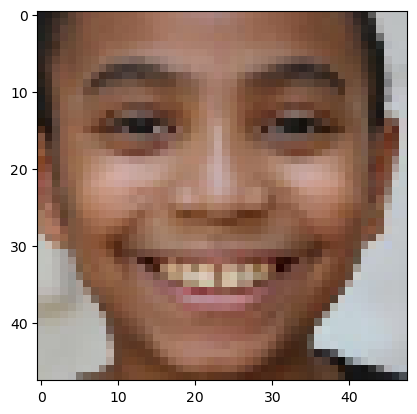

In [6]:
# checking the images
plt.imshow(images[87])

In [7]:
# Checking the ages and genders list
ages[87] , genders[87]

(10, 0)

In [8]:
# Converting the raw data set to arrays
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [9]:
# Saving the dataset
np.save(fldr+'_images.npy',images_f)
np.save(fldr+'_ages.npy',ages_f)
np.save(fldr+'_genders.npy',genders_f)

## Plotting 

In [10]:
# counting the male and female samples
values_g, counts_g = np.unique(genders_f,return_counts=True)
counts_g , values_g

(array([12391, 11317], dtype=int64), array([0, 1]))

<BarContainer object of 2 artists>

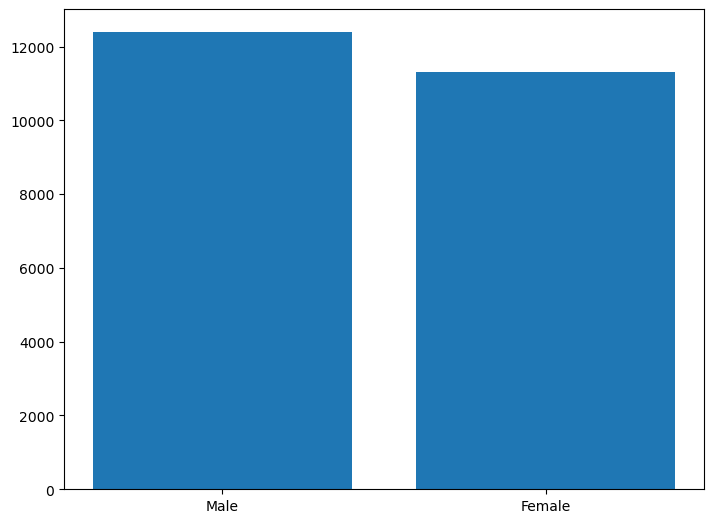

In [11]:
# plotting gender-wise count of samples
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genders = ['Male','Female']
values = list(counts_g)
ax.bar(genders, values)

In [12]:
# counting the ages samples
values_a, counts_a = np.unique(ages_f,return_counts=True)
counts_a , values_a

(array([1123,  482,  289,  273,  196,  131,  139,  263,  166,  156,   65,
         130,   81,  157,  177,  247,  158,  262,   98,  284,  346,  395,
         426,  859,  734, 2197,  615,  918,  570,  724,  350,  664,  143,
         409,  880,  483,  293,  325,  266,  526,  132,  266,  157,  100,
         440,  153,  170,  153,  148,  381,  138,  232,  241,  353,  268,
         236,   97,  271,   82,  293,  161,  125,  103,   50,  259,   77,
          94,  100,   56,  147,   33,   98,   63,   32,  148,   58,   28,
          69,   23,  133,   22,   40,   18,   24,  155,   35,   10,   34,
          33,   82,    2,   13,    5,    9,   17,    9,   11,    2,    1,
           5,    5,    1,    3,    4], dtype=int64),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,

Text(0, 0.5, 'Count of Ages')

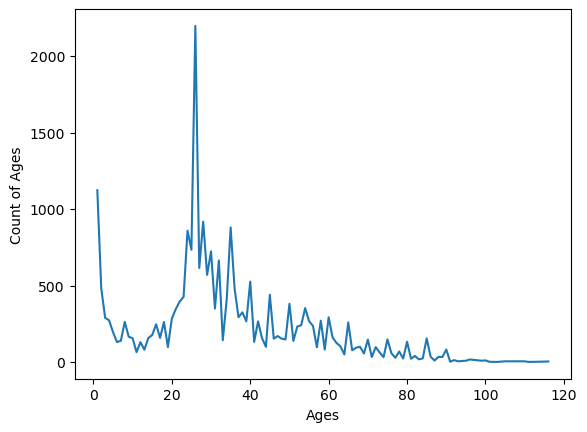

In [13]:
# Plotting age-wise count of samples
plt.plot(list(values_a),list(counts_a))
plt.xlabel('Ages')
plt.ylabel('Count of Ages')

## Defining Labels for Output

In [14]:
labels = []
i = 0
while i < len(ages_f):
    label = []
    label.append(ages_f[i])
    label.append(genders_f[i])
    labels.append(label)
    i+=1

In [15]:
images_f_2 = images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [16]:
labels_f = np.array(labels)
labels_f.shape

(23708, 2)

## Test-Train Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.25)

In [19]:
y_train[0:5]

array([[ 1,  0],
       [27,  0],
       [34,  1],
       [ 2,  0],
       [26,  1]])

In [20]:
# seperating ages and genders
y_train_2 = y_train[:,1], y_train[:,0]
y_test_2 = y_test[:,1], y_test[:,0]

In [21]:
y_train_2[0][0:5], y_train_2[1][0:5]

(array([0, 0, 1, 0, 1]), array([ 1, 27, 34,  2, 26]))

## Defining the Model

In [22]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [71]:
def create_model(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2))(conv_1)
    
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2,2))(conv_2)

    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2,2))(conv_3)

    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2,2))(conv_4)

    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64 , activation = 'relu')(flatten)
    dense_2 = Dense(64, activation = 'relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1, activation = 'sigmoid', name = 'sex_out')(drop_1)
    output_2 = Dense(1, activation = 'relu', name = 'age_out')(drop_2)

    model = Model(inputs = [inputs], outputs = [output_1,output_2])
    model.compile(loss = ['binary_crossentropy','mae'], optimizer = 'Adam', metrics = ['accuracy','accuracy'])
    return model

In [72]:
Model_1 = create_model((48,48,3))

In [73]:
Model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 48, 48, 32)        │             896 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 48, 48, 32)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 48, 48, 32)        │               0 │ dropout_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 24, 24, 32)        │               0 │ activation_4[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_5 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 12, 12, 64)        │               0 │ activation_5[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_6 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_8[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_6               │ (None, 6, 6, 128)         │               0 │ activation_6[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_6[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_7 (Activation)     │ (None, 6, 6, 256)         │               

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [74]:
file_name = 'Age_Sex_Detection.keras'
checkpoint = ModelCheckpoint(file_name,
                             monitor = 'val_loss', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode = 'auto', save_freq = 'epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint, Early_stop]

In [28]:
History = Model_1.fit(X_train,y_train_2, batch_size=64, validation_data=(X_test,y_test_2), epochs=20, callbacks=callback_list)

Epoch 1/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - age_out_accuracy: 0.0464 - loss: 18.2814 - sex_out_accuracy: 0.5182
Epoch 1: val_loss improved from inf to 18.13691, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 219s 735ms/step - age_out_accuracy: 0.0464 - loss: 18.2763 - sex_out_accuracy: 0.5182 - val_age_out_accuracy: 0.0483 - val_loss: 18.1369 - val_sex_out_accuracy: 0.5176
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - age_out_accuracy: 0.0478 - loss: 14.9348 - sex_out_accuracy: 0.5471
Epoch 2: val_loss improved from 18.13691 to 14.68901, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 256s 713ms/step - age_out_accuracy: 0.0477 - loss: 14.9328 - sex_out_accuracy: 0.5473 - val_age_out_accuracy: 0.0483 - val_loss: 14.6890 - val_sex_out_accuracy: 0.7204
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - age_out_accuracy: 0.0449 - loss: 12.5212 - sex_out_accuracy: 0.6817
Epoch 3: val_loss improved from 14.68901 to 14.4157

## Model Evaluation

In [29]:
Model_1.evaluate(X_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - age_out_accuracy: 0.0458 - loss: 9.2958 - sex_out_accuracy: 0.8894


[9.262643814086914, 0.048253752291202545, 0.8829087018966675]

In [41]:
Pred = Model_1.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step


In [42]:
Pred[1]

array([[45.16105  ],
       [25.210367 ],
       [18.563387 ],
       ...,
       [16.103151 ],
       [ 1.0567333],
       [41.14471  ]], dtype=float32)

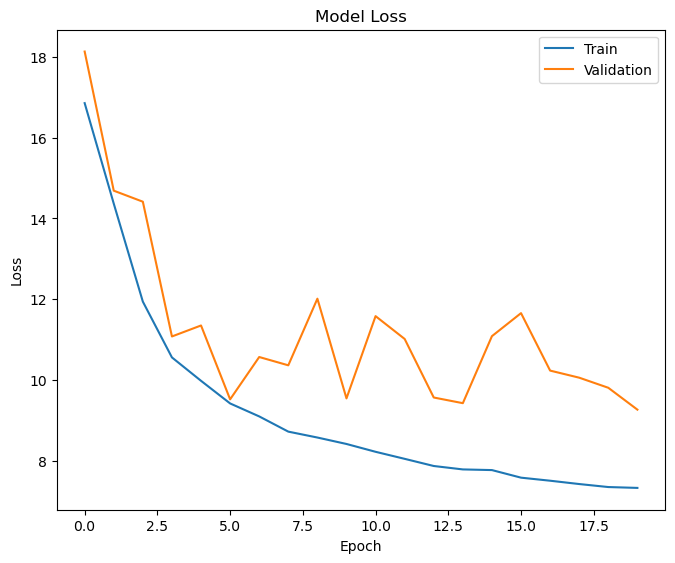

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

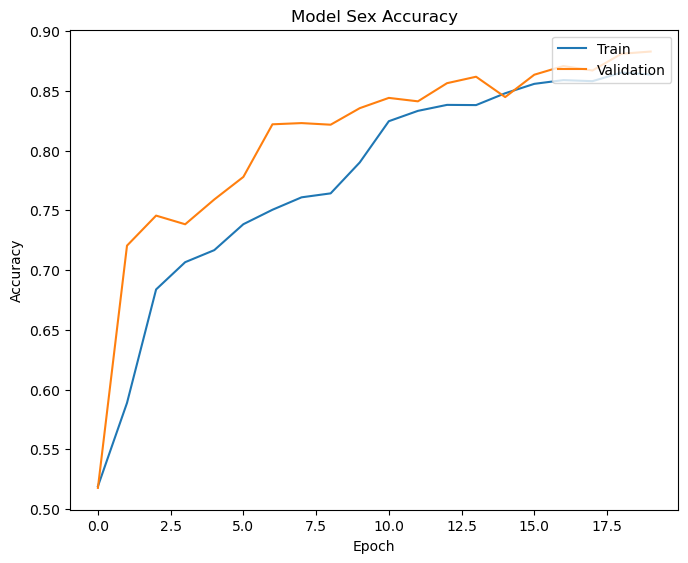

In [35]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title("Model Sex Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

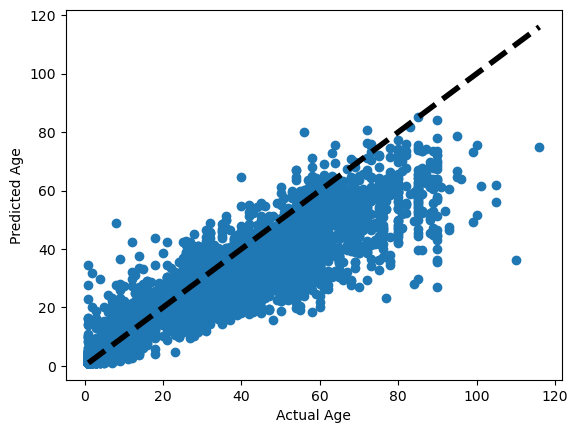

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_test_2[1], Pred[1])
ax.plot([y_test_2[1].min(), y_test_2[1].max()], [y_test_2[1].min(), y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Reports

In [44]:
i = 0
Pred_l = []

while i < len(Pred[0]):
    Pred_l.append(int(np.round(Pred[0][i])))
    i+=1

C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\3144337251.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(Pred[0][i])))


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
report = classification_report(y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3068
           1       0.89      0.86      0.88      2859

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [49]:
import seaborn as sb

In [51]:
results = confusion_matrix(y_test_2[0],Pred_l)

<Axes: >

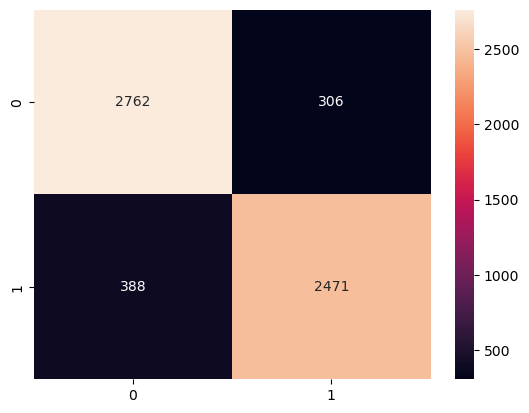

In [69]:
sb.heatmap(results,annot=True,fmt=".0f")

## Testing Images

In [63]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male','Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print('Predicted Age is '+str(age))
    print('Predicted Sex is ',sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Age is 84
Predicted Sex is  Female


C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


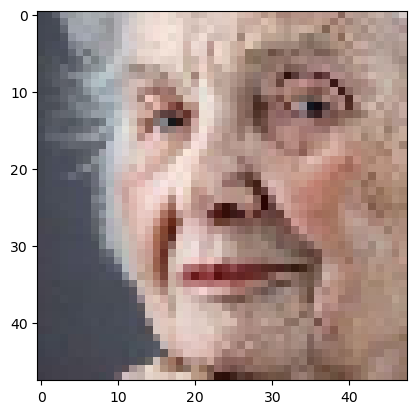

In [64]:
test_image(4,images_f,images_f_2,Model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


Predicted Age is 15
Predicted Sex is  Male


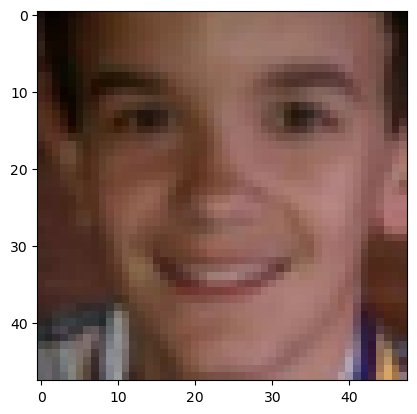

In [65]:
test_image(23,images_f,images_f_2,Model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


Predicted Age is 14
Predicted Sex is  Female


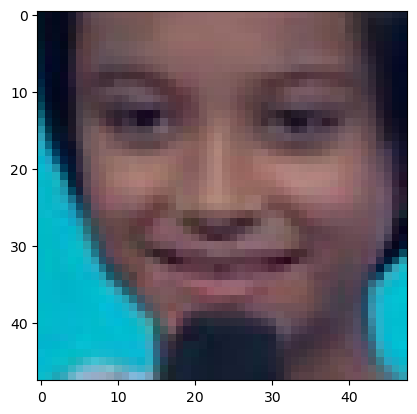

In [66]:
test_image(168,images_f,images_f_2,Model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


Predicted Age is 21
Predicted Sex is  Male


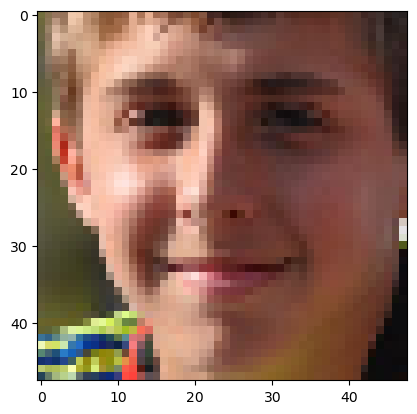

In [67]:
test_image(888,images_f,images_f_2,Model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l[1][0]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_8336\1275026645.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_l[0][0]))


Predicted Age is 19
Predicted Sex is  Female


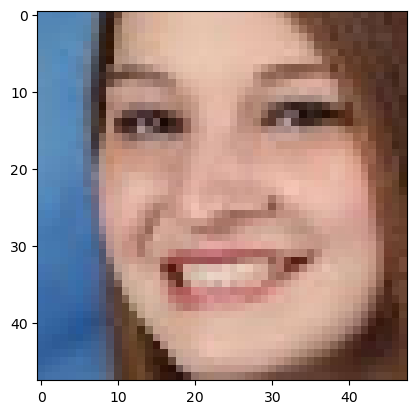

In [68]:
test_image(1288,images_f,images_f_2,Model_1)